## Final Project

 Importing necessary libraries and loading in data set

In [95]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
# Import Scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split       

import Eff_functions
from Eff_functions import simple_network,keras_regressor,DecisionTreeRegressor, LinearRegressor

#from Eff_functions import simple_network()

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler

In [4]:

import keras
from tensorflow.keras import Sequential
#from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import activations
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow
print(keras.__version__)

2.3.1


In [86]:
csv_filename = 'TTS_data .csv'

dataf = pd.read_csv(csv_filename)

/home/rl755/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (2,3,13,28,29,30,31,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [87]:
dataf = dataf.where(dataf!= -1, dataf!=' ' ).dropna()

In [6]:
dataf

,Unnamed: 0,dataProvider1,dataProvider2,program1ProjectID,PTODate_orProxy_,systemSizeInDCSTC_KW_,totalInstalledCost___,Up_FrontCashIncentive___,customerSegment,is_expansion,...,inv_model1_clean,inverterQuantity_1,additionalInverterModels_Y_N_,inv_microinv1,inv_battery_hybrid1,inv_builtin_meter1,inv_outputcapacity1,dc_optimizer,ILR,TotalModuleQty
0,0,Arizona Public Service,True,3,24-Jan-00,12.025,True,True,RES,0,...,IQ7-60-2-US [240V],True,True,1,0,0,0.24,0,True,True
1,1,Arizona Public Service,True,5,6-Mar-00,8.64,True,True,RES,0,...,SE7600H-US [240V],True,True,0,0,1,7.616,1,True,True
2,2,Arizona Public Service,True,8,7-May-02,2.4,True,True,RES,0,...,Power Station PS247-15-180 [120V],True,True,0,True,1,15.16,0,True,True
3,3,Arizona Public Service,True,10,17-Dec-02,2.16,True,True,RES,0,...,Power Station PS247-15-180 [120V],True,True,0,True,1,15.16,0,True,True
4,4,Arizona Public Service,True,11,19-Dec-02,2.52,True,True,RES,0,...,Power Station PS247-15-180 [120V],True,True,0,True,1,15.16,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617575,617575,Wisconsin Focus on Energy,-1,1147065,15-Dec-20,16.06,38320.0,2507.5,COM,0,...,-1,True,True,True,True,True,True,True,True,True
617576,617576,Wisconsin Focus on Energy,-1,1147212,16-Dec-20,10.37,43039.36,500.0,RES,0,...,-1,True,True,True,True,True,True,True,True,True
617577,617577,Wisconsin Focus on Energy,-1,1142267,16-Dec-20,13.86,52360.0,1000.0,RES,1,...,-1,True,True,True,True,True,True,True,True,True
617578,617578,Wisconsin Focus on Energy,-1,1143039,17-Dec-20,6.82,25583.0,500.0,RES,0,...,-1,True,True,True,True,True,True,True,True,True


## Introductory Plots

Here I show some simple plots to illustrate various factors and find obvious correlations. 

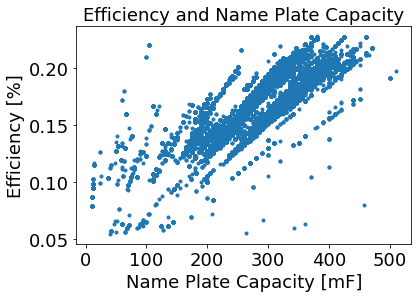

In [100]:
plt.figure()
plt.title("Efficiency and Name Plate Capacity", fontsize=18)

X = dataf['mod_nameplate_capacity1'].values.reshape(-1, 1)
y = dataf['mod_efficiency1'].values
plt.xlabel('Name Plate Capacity [mF]')
plt.ylabel('Efficiency [%]')

plt.plot(X, y ,linestyle = '', marker = '.') #Plotting Efficiency vs Nameplate Capacity

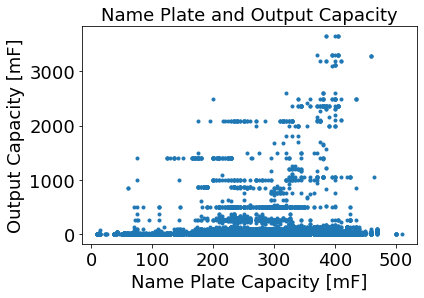

In [106]:
plt.figure()
plt.title("Name Plate and Output Capacity", fontsize=18)

X = dataf['mod_nameplate_capacity1'].values.reshape(-1, 1)
y = dataf['inv_outputcapacity1'].values
plt.xlabel('Name Plate Capacity [mF]')
plt.ylabel('Output Capacity [mF]')

plt.plot(X, y ,linestyle = '', marker = '.') #Plotting Efficiency vs Nameplate Capacity
#dataf.plot.scatter( X, 'inv_outputcapacity1')

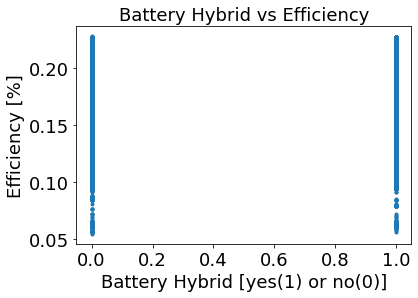

In [102]:
plt.figure()
plt.title("Battery Hybrid vs Efficiency", fontsize=18)

X = dataf['inv_battery_hybrid1'].values.reshape(-1, 1)
y = dataf['mod_efficiency1'].values
plt.xlabel('Battery Hybrid [yes(1) or no(0)]')
plt.ylabel('Efficiency [%]')

plt.plot(X, y ,linestyle = '', marker = '.') #Plotting Efficiency vs Battery Hybrid type

#dataf.plot.scatter( 'inv_battery_hybrid1', 'mod_efficiency1')

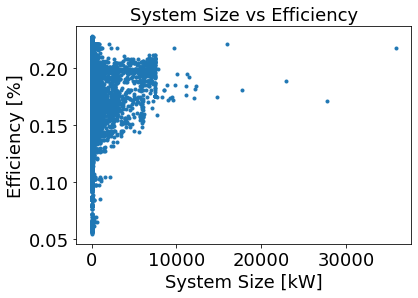

In [103]:
plt.figure()
plt.title("System Size vs Efficiency", fontsize=18)

X = dataf['systemSizeInDCSTC_KW_'].values.reshape(-1, 1)
y = dataf['mod_efficiency1'].values
plt.xlabel('System Size [kW]')
plt.ylabel('Efficiency [%]')
plt.plot(X, y ,linestyle = '', marker = '.') #Plotting Efficiency vs System Size


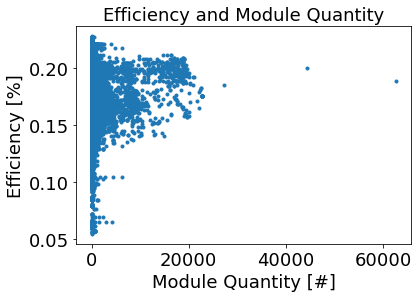

In [104]:
plt.figure()
plt.title("Efficiency and Module Quantity", fontsize=18)

X = dataf['moduleQty_1'].values.reshape(-1, 1)
y = dataf['mod_efficiency1'].values
plt.xlabel('Module Quantity [#]')
plt.ylabel('Efficiency [%]')

plt.plot(X, y ,linestyle = '', marker = '.') #Plotting Efficiency vs Module Quantity
#dataf.plot.scatter( 'moduleQty_1', 'mod_efficiency1')

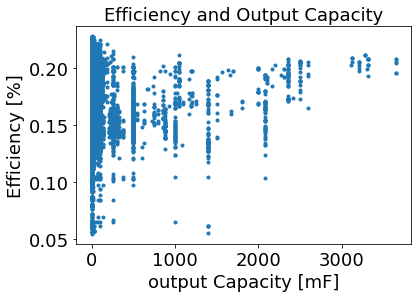

In [105]:
plt.figure()
plt.title("Efficiency and Output Capacity", fontsize=18)

X = dataf['inv_outputcapacity1'].values.reshape(-1, 1)
y = dataf['mod_efficiency1'].values
plt.xlabel('output Capacity [mF]')
plt.ylabel('Efficiency [%]')

plt.plot(X, y ,linestyle = '', marker = '.') #Plotting Efficiency vs output Capacity
#dataf.plot.scatter( 'inv_outputcapacity1', 'mod_efficiency1')

## Linear Regression Model for Efficiency and Nameplate Capacity

In [26]:
X = dataf['mod_nameplate_capacity1'].values.reshape(-1, 1)
y = dataf['mod_efficiency1'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98, shuffle=True)

In [28]:
# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
Y_calc_test = regr.predict(X_test)
Y_calc_test

array([0.16255206, 0.18001581, 0.19093066, ..., 0.19529659, 0.17783284,
       0.18656472])

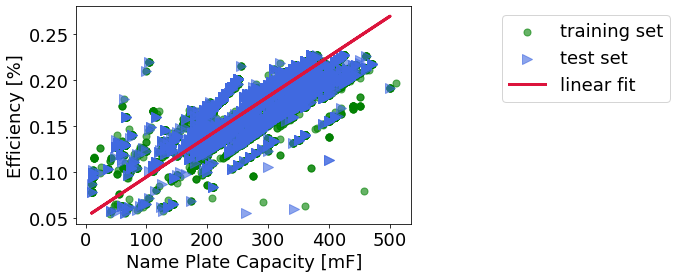

In [30]:
# Plotting our data with a scatter plot
plt.scatter(X_train, y_train, s=50, marker='o', color="green", alpha=0.6, label="training set")
plt.scatter(X_test, y_test, s=100, marker='>', color="royalblue", alpha=0.6, label="test set")
plt.xlabel('Name Plate Capacity [mF]')
plt.ylabel('Efficiency [%]')

# Plotting the linear regression ontop of the scatter plot 
plt.plot(X_test, Y_calc_test, color='crimson',linewidth=3, label='linear fit', marker = ',')
#plt.plot(X_test, Y_calc_test_2,':', color='black',linewidth=2, label='linear fit check')
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right')
plt.show()

In [31]:
# The mean squared error

print('Mean squared error: ', (mean_squared_error(y_test, Y_calc_test)))
# Print the coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, Y_calc_test))

Mean squared error:  0.0001076953744925368
Coefficient of determination: 0.78


## Stepwise Selection
A Backwards StepWise Selection to determine factors that have correlation with efficiency. 

In [107]:
Xs = dataf[['systemSizeInDCSTC_KW_', 'azimuth_1', 'tilt_1', 'mod_BIPV1', 
        'mod_bifacial1', 'mod_nameplate_capacity1', 'inverterQuantity_1', 
        'inv_microinv1', 'inv_battery_hybrid1', 'inv_builtin_meter1', 'inv_outputcapacity1', 
        'dc_optimizer', 'ILR', 'TotalModuleQty', 'latitude', 'longitude']]

ys = dataf['mod_efficiency1']
X_trains, X_tests, y_trains, y_tests = train_test_split(Xs, ys, test_size=0.21, random_state=9, shuffle = True)

In [108]:
names = 'systemSizeInDCSTC_KW_','azimuth_1', 'tilt_1', 'mod_BIPV1', 'mod_bifacial1', 'mod_nameplate_capacity1', 'mod_efficiency1', 'inverterQuantity_1', 'inv_microinv1', 'inv_battery_hybrid1', 'inv_builtin_meter1', 'inv_outputcapacity1', 'dc_optimizer', 'ILR', 'TotalModuleQty', 'latitude', 'longitude'
f_names = np.array(names)

In [109]:
sfs_backward = SequentialFeatureSelector(linear_model.LinearRegression(), 
                                        n_features_to_select=5, 
                                        direction = 'backward').fit(Xs,ys)

print('support: ', sfs_backward.get_support(), "\n")
selected = sfs_backward.get_support(indices = True)
print(selected)
print('Selected input features using Backward Stepwise Selection: \n', f_names[selected])

support:  [False False False  True False  True False  True  True False False False
 False  True False False] 

[ 3  5  7  8 13]
Selected input features using Backward Stepwise Selection: 
 ['mod_BIPV1' 'mod_nameplate_capacity1' 'inverterQuantity_1'
 'inv_microinv1' 'ILR']


## Decision Tree Regression

Here are outputs from a Decision Tree Regressor, showing similar outputs from the Linear Regression

In [43]:
X = dataf['mod_nameplate_capacity1'].values.reshape(-1, 1)
y = dataf['mod_efficiency1'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98, shuffle=True)

In [50]:
DecisionTreeRegressor(X_train, X_test, y_train, y_test)

TypeError: __init__() takes 1 positional argument but 5 were given

In [45]:
# Declare regressor object & train it for nameplate capacitance and efficiency
dftree =  sklearn.tree.DecisionTreeRegressor().fit(X_train, y_train)
# Predict on .... set values

#reg = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = dftree.predict(X_test)
# Compute the r2 score and MSE
r2 = r2_score(y_test, y_pred)

#return r2, MSE, y_predict, X_train, X_test, y_train, y_test
print('r2 value:', r2)
# Evaluate MSE error
MSE = mean_squared_error(y_test, y_pred)
print('MSE Value : ', MSE)

r2 value: 0.8417592683646062
MSE Value :  7.630438754679849e-05


We see an r^2 value of 0.87 which is a decently strong correlation although not as good as one would like. 

## Neural Network

A Neural Network model using Keras and Tensorflow to investigate nameplate capacity and efficiency

In [51]:
X = dataf[['mod_nameplate_capacity1']].values
Y = dataf[['mod_efficiency1']].values
X = np.asarray(X).astype('float32')

In [52]:
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.20,
                                                    random_state=98)

In [53]:
# Create the scaler from the training data only
X_train_scaler = StandardScaler().fit(X_train_pn)

# Apply the scaler transform to the training data
X_train = X_train_scaler.transform(X_train_pn)


In [54]:
# def simple_network():
#     model = Sequential()
#     model.add(Dense(7, activation = 'relu', kernel_initializer = 'normal'))
#     model.add(Dense(1, kernel_initializer= 'normal'))
#     model.compile(loss = 'mean_squared_error', optimizer = 'adam')
#     return model

In [55]:
# Create an instance of your simple_network() function
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
my_model = simple_network()
my_model.fit(X_train, y_train)
# Print it's summary()
my_model.summary()

2022-03-14 15:27:16.154844: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-14 15:27:16.161149: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-14 15:27:16.167277: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-03-14 15:27:16.409723: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-14 15:27:16.426290: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1796560000 Hz


15303/15303 [==============================] - 80s 5ms/step - loss: 4.5526e-04
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 14        
_________________________________________________________________
dense_1 (Dense)              (None, 40)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 375
Trainable params: 375
Non-trainable params: 0
_________________________________________________________________


In [58]:
epochs =30
batch_size = 1000
# def keras_regressor(epochs, batch_size):
#     """ Neural Net Keras regressor. Input the desired number of Epochs and Batch size for the data set. """
#     np.random.seed(98)
#     estimator = KerasRegressor(build_fn=simple_network,
#                               epochs = epochs, batch_size= batch_size, verbose =0)
#     history = estimator.fit(X_train, y_train, validation_split=0.33, epochs =epochs,
#                            batch_size= batch_size, verbose =1)
    
#     return history

In [59]:

keras_regressor(epochs, batch_size)

Epoch 1/30
329/329 [==============================] - 6s 14ms/step - loss: 0.0086 - val_loss: 9.2120e-05
Epoch 2/30
329/329 [==============================] - 3s 10ms/step - loss: 8.9670e-05 - val_loss: 8.6677e-05
Epoch 3/30
329/329 [==============================] - 4s 12ms/step - loss: 8.5325e-05 - val_loss: 8.5730e-05
Epoch 4/30
329/329 [==============================] - 3s 9ms/step - loss: 8.5367e-05 - val_loss: 8.4857e-05
Epoch 5/30
329/329 [==============================] - 3s 10ms/step - loss: 8.3932e-05 - val_loss: 8.4789e-05
Epoch 6/30
329/329 [==============================] - 2s 7ms/step - loss: 8.3897e-05 - val_loss: 8.4082e-05
Epoch 7/30
329/329 [==============================] - 3s 9ms/step - loss: 8.3927e-05 - val_loss: 8.4101e-05
Epoch 8/30
329/329 [==============================] - 3s 10ms/step - loss: 8.4289e-05 - val_loss: 8.5112e-05
Epoch 9/30
329/329 [==============================] - 3s 9ms/step - loss: 8.4321e-05 - val_loss: 8.3909e-05
Epoch 10/30
329/329 [======

In [62]:
#Calling the function does not like to return the history values, so here is a backup method. 
estimator = KerasRegressor(build_fn=simple_network,
                              epochs = epochs, batch_size= batch_size, verbose =0);
history = estimator.fit(X_train, y_train, validation_split=0.33, epochs =epochs,
                           batch_size= batch_size, verbose =1);


Epoch 1/30
329/329 [==============================] - 5s 13ms/step - loss: 0.0085 - val_loss: 1.0686e-04
Epoch 2/30
329/329 [==============================] - 2s 7ms/step - loss: 1.0399e-04 - val_loss: 1.0100e-04
Epoch 3/30
329/329 [==============================] - 3s 9ms/step - loss: 9.6983e-05 - val_loss: 9.0834e-05
Epoch 4/30
329/329 [==============================] - 3s 8ms/step - loss: 8.9502e-05 - val_loss: 8.8345e-05
Epoch 5/30
329/329 [==============================] - 7s 22ms/step - loss: 8.7380e-05 - val_loss: 8.6915e-05
Epoch 6/30
329/329 [==============================] - 3s 9ms/step - loss: 8.7370e-05 - val_loss: 8.6465e-05
Epoch 7/30
329/329 [==============================] - 6s 17ms/step - loss: 8.6009e-05 - val_loss: 8.6209e-05
Epoch 8/30
329/329 [==============================] - 5s 15ms/step - loss: 8.5919e-05 - val_loss: 8.6013e-05
Epoch 9/30
329/329 [==============================] - 6s 18ms/step - loss: 8.5895e-05 - val_loss: 8.6006e-05
Epoch 10/30
329/329 [======

In [68]:
print(history.history.keys())
print("final MSE for training is and for validation is " , 
      (history.history['loss'][-1], history.history['val_loss'][-1]))

dict_keys(['loss', 'val_loss'])
final MSE for training is and for validation is  (8.544126467313617e-05, 8.57619452290237e-05)


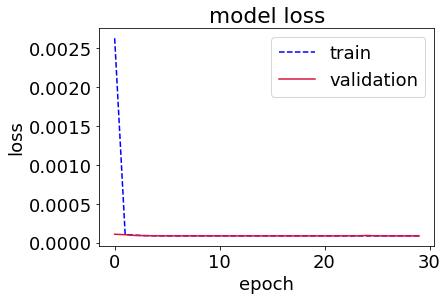

In [69]:
# Plot of model loss
plt.plot(history.history['loss'], '--', c='b')
plt.plot(history.history['val_loss'], c='crimson')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

We can see that the model loss drops to very low numbers. Below is a zoomed in plot to show how the validation still follows the test set very closely for most epochs. 

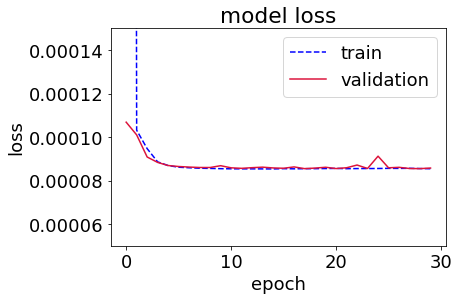

In [80]:
# Plot of model loss
plt.plot(history.history['loss'], '--', c='b')
plt.plot(history.history['val_loss'], c='crimson')
plt.ylim([0.00005,0.00015])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [75]:
# Test set error
#X_test = np.asarray(X_Test).astype('float32')
y_test = np.asarray(y_test).astype('float32')
test_loss = estimator.model.evaluate(X_test_pn, y_test)
print("test set mse is: " , test_loss)

3826/3826 [==============================] - 15s 4ms/step - loss: 0.4592
test set mse is:  0.4591660797595978


## Comparison of Efficiency based on Latitude and Longitude

Some example plots comparing efficiency with location. Geocoding visualizations do a better job at showing variations. From these plots we can see there are some correlations, but not a lot of information to go off of. 

<AxesSubplot:xlabel='mod_efficiency1', ylabel='latitude'>

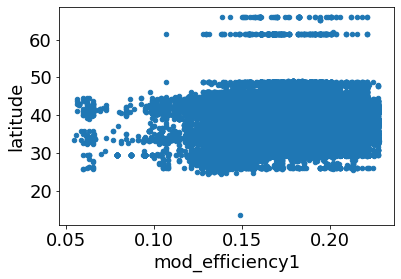

In [83]:
Xl = dataf['latitude'].values.reshape(-1, 1)
#Xl = np.delete(Xl,[' '])
yl = dataf['mod_efficiency1'].values
dataf.plot.scatter('mod_efficiency1', 'latitude')

In [84]:
X_train, X_test, y_train, y_test = train_test_split(Xl, yl, test_size=0.2, random_state=98, shuffle=True)

In [85]:
# # Plotting our data with a scatter plot
# plt.scatter(X_train, y_train, s=50, marker='o', color="green", alpha=0.6, label="training set")
# plt.scatter(X_test, y_test, s=100, marker='>', color="royalblue", alpha=0.6, label="test set")
# plt.xlabel('mod_nameplate_capacity1 ()')
# plt.ylabel('mod_efficiency1 (%)')

# # Plotting the linear regression ontop of the scatter plot 
# plt.plot(X_test, Y_calc_test, color='crimson',linewidth=3, label='linear fit')
# #plt.plot(X_test, Y_calc_test_2,':', color='black',linewidth=2, label='linear fit check')
# plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right')
# plt.show()

<AxesSubplot:xlabel='longitude', ylabel='mod_efficiency1'>

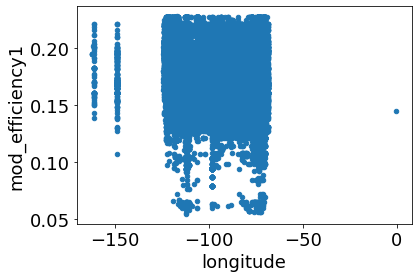

In [86]:
X = dataf['longitude'].values.reshape(-1, 1)
y = dataf['mod_efficiency1'].values
dataf.plot.scatter('longitude','mod_efficiency1')

## Comparison of Efficiency and System Size

<AxesSubplot:xlabel='systemSizeInDCSTC_KW_', ylabel='mod_efficiency1'>

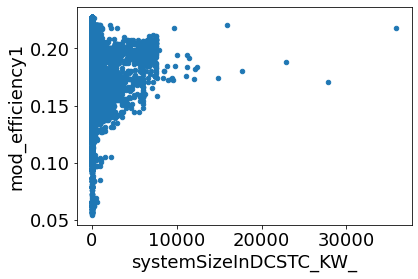

In [88]:
Xs = dataf['systemSizeInDCSTC_KW_'].values.reshape(-1, 1)
ys = dataf['mod_efficiency1'].values
dataf.plot.scatter('systemSizeInDCSTC_KW_','mod_efficiency1')

In [89]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=98, shuffle=True)

In [97]:
# Create linear regression object
# regr = linear_model.LinearRegression()
# regr.fit(X_train, y_train)
# Y_calc_test = regr.predict(X_test)
LinearRegressor(X_train, y_train, X_test)

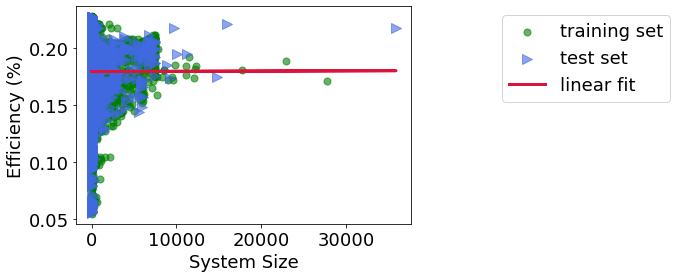

In [98]:
# Plotting our data with a scatter plot
plt.scatter(X_train, y_train, s=50, marker='o', color="green", alpha=0.6, label="training set")
plt.scatter(X_test, y_test, s=100, marker='>', color="royalblue", alpha=0.6, label="test set")
plt.xlabel('System Size')
plt.ylabel('Efficiency (%)')

# Plotting the linear regression ontop of the scatter plot 
plt.plot(X_test, Y_calc_test, color='crimson',linewidth=3, label='linear fit')
#plt.plot(X_test, Y_calc_test_2,':', color='black',linewidth=2, label='linear fit check')
plt.legend(bbox_to_anchor=(1.8, 1), loc='upper right')
plt.show()

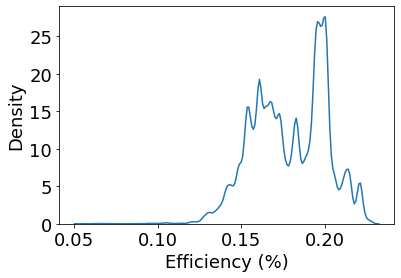

In [99]:
sns.kdeplot(data=dataf, x="mod_efficiency1")
plt.xlabel('Efficiency (%)')

plt.show()

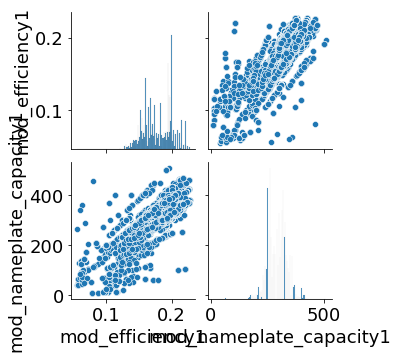

In [94]:
sns.pairplot(data=dataf[["mod_efficiency1", "mod_nameplate_capacity1"]])
fig.tight_layout()

## Investigation into California

In [95]:
datafC = dataf.where( dataf['state'] == 'CA' ).dropna()

In [96]:
datafC

,Unnamed: 0,dataProvider1,dataProvider2,program1ProjectID,PTODate_orProxy_,systemSizeInDCSTC_KW_,totalInstalledCost___,Up_FrontCashIncentive___,customerSegment,is_expansion,...,inv_model1_clean,inverterQuantity_1,additionalInverterModels_Y_N_,inv_microinv1,inv_battery_hybrid1,inv_builtin_meter1,inv_outputcapacity1,dc_optimizer,ILR,TotalModuleQty
355563,355563.0,California Center for Sustainable Energy (Bear...,-1,BVSI-0041,9-Jul-14,7.0,17500.0,4294.0,RES,0.0,...,M250-60-2LL-S25-NA (240V),14.0,True,1,0,0,0.24,0,True,27.161251
355564,355564.0,California Center for Sustainable Energy (Bear...,-1,BVSI-0049,4-Feb-15,6.6,31000.0,5418.0,RES,0.0,...,M250-60-2LL-S25-NA (240V),24.0,True,1,0,0,0.24,0,1.145833,47.170807
355565,355565.0,California Center for Sustainable Energy (Bear...,-1,BVSI-0050,4-Feb-15,4.4,21000.0,5655.0,RES,0.0,...,M250-60-2LL-S25-NA (240V),16.0,True,1,0,0,0.24,0,1.145833,31.170807
355566,355566.0,California Center for Sustainable Energy (Bear...,-1,BVSI-0053,17-Sep-14,4.104,31360.0,2797.0,RES,0.0,...,SB3000TL-US-22 [240V],2.0,True,0,True,1,3.05,0,True,151.102203
355567,355567.0,California Center for Sustainable Energy (Bear...,-1,BVSI-0056,13-Feb-14,4.5,20000.0,6216.0,RES,0.0,...,M215-60-2LL-S2x-NA [240V],18.0,True,1,True,0,0.215,0,1.162791,35.153374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612664,612664.0,California Public Utilities Commission,-1,SCE-INT-NST-114132,5-Mar-20,9.62,17647.42,0.0,RES,0.0,...,SE10000H-US [240V],1.0,0,0,0,0,9.994,1,0.962578,51.192708
612665,612665.0,California Public Utilities Commission,California Energy Commission,SCE-INT-NST-115264,7-Mar-20,4.2,18900.0,1302.0,RES,0.0,...,SPR-X21-350-BLK-E-AC [240V],12.0,0,1,0,0,0.315,0,1.111111,23.214724
612666,612666.0,California Public Utilities Commission,-1,SCE-INT-NST-115622,5-Mar-20,4.2,21336.0,0.0,RES,0.0,...,SPR-X21-350-BLK-E-AC [240V],12.0,0,1,0,0,0.315,0,1.111111,23.214724
612667,612667.0,California Public Utilities Commission,-1,SCE-INT-NST-115980,5-Mar-20,4.2,17850.0,0.0,RES,0.0,...,SPR-X21-350-BLK-E-AC [240V],12.0,0,1,0,0,0.315,0,1.111111,23.214724


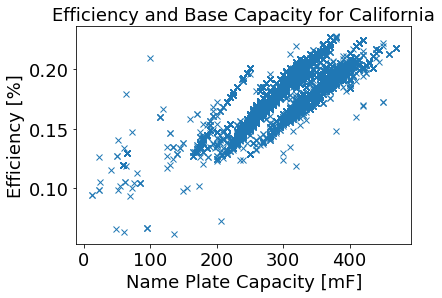

In [97]:
plt.figure()
plt.title("Efficiency and Base Capacity for California", fontsize=18)

Xc = datafC['mod_nameplate_capacity1'].values.reshape(-1, 1)
yc = datafC['mod_efficiency1'].values
plt.xlabel('Name Plate Capacity [mF]')
plt.ylabel('Efficiency [%]')

plt.plot(Xc, yc ,linestyle = '', marker = 'x') #Plotting Efficiency vs Nameplate Capacity

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8, shuffle=True)

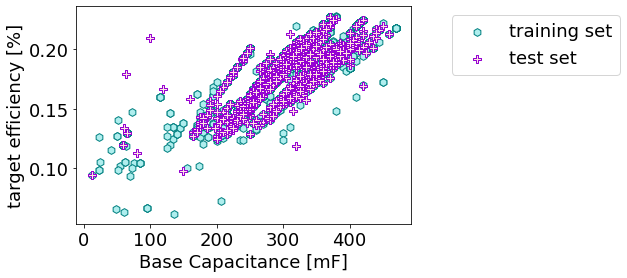

In [99]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,0], y_train, s=60, marker='h', c='paleturquoise', edgecolors='teal', label='training set')
ax.scatter(X_test[:,0], y_test, s=60, marker='P', c='mistyrose', edgecolors='darkviolet',label='test set')
ax.set_ylabel("target efficiency [%]")
ax.set_xlabel('Base Capacitance [mF]')
ax.legend(loc='upper right', bbox_to_anchor=(1.65, 1))
plt.show()

In [100]:
reg = linear_model.LinearRegression().fit(X_train, y_train)
y_predict = reg.predict(X_test)
r2 = r2_score(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)

print("r2 score:", r2, " MSE:", MSE)

r2 score: 0.7303818723705231  MSE: 8.731303155648702e-05


#### K-Fold CV

In [101]:
fold = sklearn.model_selection.KFold(n_splits = 5)
fold.get_n_splits(X)


5

In [102]:

MSE_fold = []

for train_index, test_index in fold.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit a linear regressor to the train data corresponding to those indices 
    reg = linear_model.LinearRegression().fit(X_train, y_train)
    y_predict = reg.predict(X_test)
    # Predict the test data
     #MSE_tmp = fit_predict(X, y, seed = i,split_fraction = 0.25)
    # Compute the error and append it to a list
    MSE_fold.append(mean_squared_error(y_test,y_predict))
    
    
print('kf = ', len(MSE_fold))


kf =  5


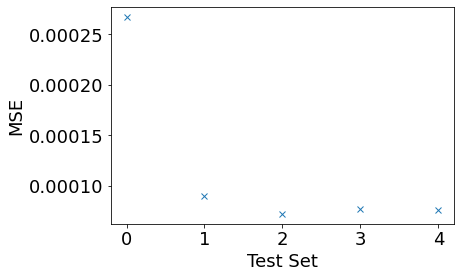

In [103]:
fig, ax = plt.subplots();
np.arange(0,112,1);
fig.tight_layout()

ax.plot(MSE_fold,'x');
ax.set_xlabel("Test Set")
ax.set_ylabel("MSE");


The k-fold CV follows a similar trend as the Neural Net loss model

In [130]:
CVn = 1/5* np.sum(MSE_fold)
print("K-Fold-5 Cross Validation number: ", CVn)

K-Fold-5 Cross Validation number:  0.00011622859545276414


#### Bootstrap

In [105]:
N_samples = 100
coeffs = []
intercepts = []

MSE_Boot = []

for i in range(N_samples):
    # Get a bootstrapped X and y set from the resample function make sure to set replace=True
    bootX, booty = sklearn.utils.resample(X,y,replace = True, n_samples = len(y), random_state = i)
 

    # Fit a linear regressor to the train data corresponding to those indices 
    reg = linear_model.LinearRegression().fit(bootX, booty)
    #y_predict = reg.predict(X_test)
    # Appending the intercepts and coefficients to lists
    # Computing the error and appending it to a list
    coeffs.append(reg.coef_)
    intercepts.append(reg.intercept_)


In [52]:
# Compute your mean coefficients and intercept
n_coeffs = X.shape[1]

coeffs_new = np.array(coeffs).reshape(-1, n_coeffs)

print(n_coeffs, coeffs_new)

1 [[0.00040044]
 [0.0004008 ]
 [0.0004    ]
 [0.00040153]
 [0.00039984]
 [0.00040136]
 [0.00040006]
 [0.00039899]
 [0.00039783]
 [0.00039986]
 [0.00040152]
 [0.00040131]
 [0.00039917]
 [0.00040034]
 [0.00040134]
 [0.00040002]
 [0.00040062]
 [0.00039902]
 [0.00039967]
 [0.00039946]
 [0.00040104]
 [0.00039901]
 [0.00039869]
 [0.00039907]
 [0.00039898]
 [0.00040175]
 [0.00040023]
 [0.00039944]
 [0.00040195]
 [0.00040034]
 [0.00039912]
 [0.00039874]
 [0.00040149]
 [0.00039844]
 [0.0004    ]
 [0.00039959]
 [0.0004013 ]
 [0.00039921]
 [0.00039819]
 [0.00040064]
 [0.0004006 ]
 [0.00039992]
 [0.00040121]
 [0.00040235]
 [0.00040035]
 [0.00039899]
 [0.00039873]
 [0.00040169]
 [0.00040018]
 [0.00040157]
 [0.00039857]
 [0.00040093]
 [0.00039795]
 [0.00040011]
 [0.00040049]
 [0.00039931]
 [0.00040077]
 [0.00040165]
 [0.00040008]
 [0.00039879]
 [0.00040014]
 [0.00040045]
 [0.00039983]
 [0.000399  ]
 [0.00040011]
 [0.00040299]
 [0.00040119]
 [0.00040291]
 [0.00039837]
 [0.00039999]
 [0.00040149]
 [0.